In [1]:
#### 합성곱 신경망을 사용한 이미지 분류


# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
#### 패션 MNIST 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()

train_scaled=train_input.reshape(-1, 28,28,1)/255.0

train_scaled, val_scaled, train_target, val_target=train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
#### 합성곱 신경망 만들기

model=keras.Sequential()

In [5]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [6]:
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [28]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
#### 모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(train_scaled, train_target, epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.5067 - accuracy: 0.8185 - val_loss: 0.3168 - val_accuracy: 0.8822
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3356 - accuracy: 0.8790 - val_loss: 0.2724 - val_accuracy: 0.8975
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2903 - accuracy: 0.8968 - val_loss: 0.2523 - val_accuracy: 0.9068
Epoch 4/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2543 - accuracy: 0.9073 - val_loss: 0.2331 - val_accuracy: 0.9128
Epoch 5/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2328 - accuracy: 0.9142 - val_loss: 0.2293 - val_accuracy: 0.9140
Epoch 6/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2126 - accuracy: 0.9225 - val_loss: 0.2183 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1961 - accuracy: 0.9269 - val_loss: 0.2153 -

In [30]:
import matplotlib.pyplot as plt

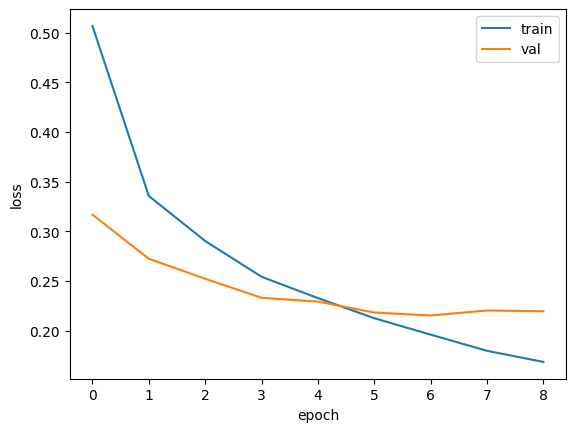

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2153 - accuracy: 0.9217


[0.21532778441905975, 0.92166668176651]

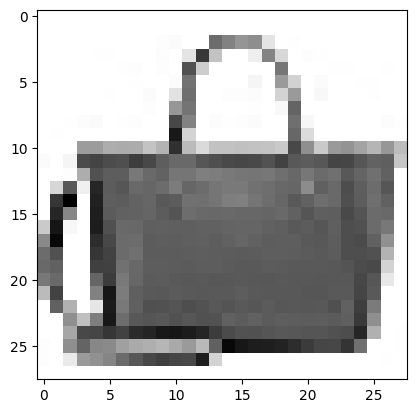

In [33]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

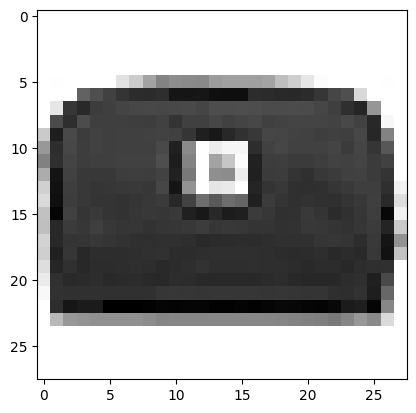

In [34]:
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.show()

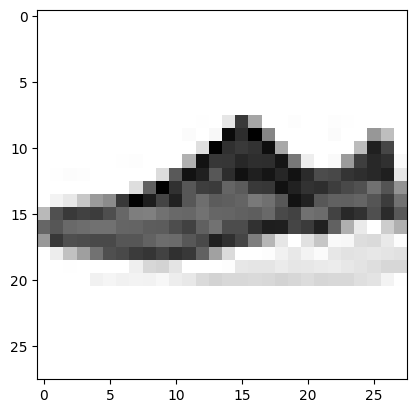

In [35]:
plt.imshow(val_scaled[2].reshape(28,28), cmap='gray_r')
plt.show()

In [36]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 120ms/step
[[1.0079661e-15 1.5208252e-25 3.5993282e-21 7.5049146e-19 2.4214533e-17
  4.1302576e-13 5.7876660e-16 2.4848788e-17 1.0000000e+00 1.3938428e-17]]


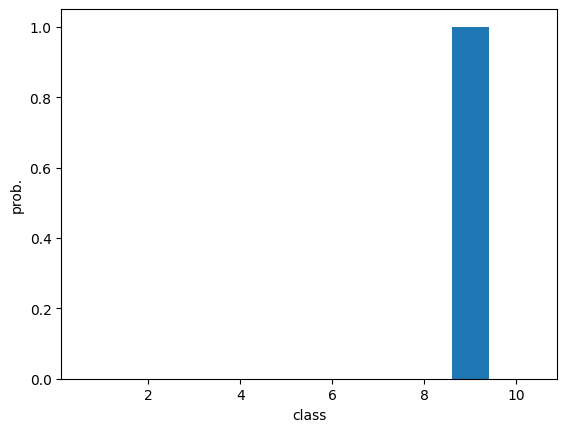

In [37]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [38]:
classes=['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [39]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [40]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [41]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2455 - accuracy: 0.9133


[0.24546359479427338, 0.9132999777793884]